SABR model:
$$
\begin{aligned}
    &dF_t = \alpha_t F_t^{\beta} dW_t\\
    &d\alpha_t = v \alpha_t dZ_t\\
    dW_t dZ_t = \rho dt
\end{aligned}
$$

Let us introduce parameters:
$$
\begin{aligned}
&F_m = \sqrt{F K}\\
&\zeta = \dfrac{v}{\alpha}F_m^{1-\beta}\log \dfrac{F}{K}\\
&X(\zeta, \rho) = \log \dfrac{\sqrt{1 - 2 \zeta \rho + \zeta^2} + \zeta - \rho}{1-\rho}\\
&q_1 = \dfrac{(\beta-1)^2 \alpha^2 F_m^{2\beta - 2}}{24}\\
&q_2 = \dfrac{\rho \beta \alpha v F_m^{\beta - 1}}{4}\\
&q_3 = \dfrac{2-3\rho^2}{24}v^2\\
&S = 1 + T(q_1 + q_2 + q_3)\\
&D = F_m^{1-\beta}\left[ 1 + \dfrac{(\beta-1)^2}{24} \log^2 \dfrac{F}{K} + \dfrac{(\beta-1)^4}{1920}\log^4 \dfrac{F}{K}\right]\\
\end{aligned}
$$
$$
\sigma = \dfrac{\alpha S}{D} \times \dfrac{\zeta}{X(\zeta, \rho)}
$$

In [1]:
from sabr import SABR
from sabr_calibration import SABRCalibrator

from heston import Heston
from heston_calibration import HestonCalibrator

import numpy as np
from matplotlib import pyplot as plt

## SABR calibration example

In [2]:
#sabr model parameters
alpha = 0.2
v = 0.9
beta = 0.9
rho = -0.5

sabr_params_0 = np.asarray([alpha, v, beta, rho])

#market params
r = 0
F = 4.0
T = 1.123

#strikes
Kn = F * np.linspace(0.5, 2.6, 32)

In [3]:
#sabr model
sabr_0 = SABR(sabr_params_0, r)

In [4]:
c0, iv0 = sabr_0( Kn, F, T )

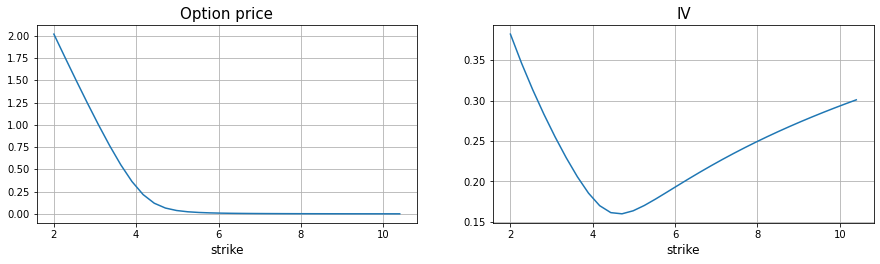

In [5]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, c0)
ax1.grid()
ax1.set_title("Option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, iv0)
ax2.grid()
ax2.set_title("IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration:

In [6]:
#sabr calibrator object
sabr_calib = SABRCalibrator(r)

 23%|█████████▍                               | 23/100 [00:00<00:00, 600.60it/s]


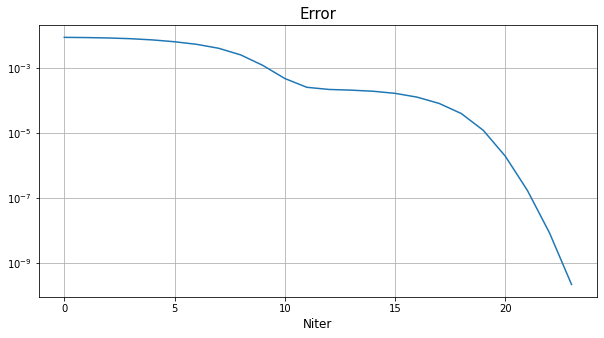

In [22]:
#calibrate sabr model
fs = sabr_calib.fit_iv(iv0, Kn, F, T, fit_beta=True)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [23]:
print("real params:", sabr_params_0)
print("calib params:", sabr_calib.sabr_params)

real params: [ 0.2  0.9  0.9 -0.5]
calib params: [ 0.2  0.9  0.9 -0.5]


In [24]:
#predict option prices
c1, iv1 = sabr_calib.predict(Kn, F, T )

In [25]:
c1 - c0

array([ 1.03708153e-11,  7.39008854e-12,  2.31947794e-12, -5.10658182e-12,
       -1.47686308e-11, -2.55750976e-11, -3.43893802e-11, -3.51279006e-11,
       -2.21320740e-11, -1.61648472e-12,  1.11721743e-11,  1.36948786e-11,
        1.17841847e-11,  9.07474096e-12,  6.70993816e-12,  4.87596075e-12,
        3.50311447e-12,  2.48255583e-12,  1.72112324e-12,  1.14866450e-12,
        7.14386883e-13,  3.82010396e-13,  1.25597449e-13, -7.36875838e-14,
       -2.29493508e-13, -3.51781104e-13, -4.48172749e-13, -5.24250782e-13,
       -5.84369358e-13, -6.31748126e-13, -6.68997843e-13, -6.98109973e-13])

In [26]:
iv1 - iv0

array([ 3.82951448e-11,  1.94010363e-11,  4.43006742e-12, -7.24825755e-12,
       -1.59418034e-11, -2.16174578e-11, -2.37792841e-11, -2.13357110e-11,
       -1.32126254e-11, -1.09590115e-12,  9.71975278e-12,  1.61958780e-11,
        1.90650551e-11,  1.97516448e-11,  1.91890670e-11,  1.78876358e-11,
        1.61262947e-11,  1.40630563e-11,  1.17935661e-11,  9.37877553e-12,
        6.85970725e-12,  4.26397806e-12,  1.61312630e-12, -1.07908127e-12,
       -3.80018239e-12, -6.54087895e-12, -9.29500921e-12, -1.20553567e-11,
       -1.48195345e-11, -1.75828796e-11, -2.03416728e-11, -2.30941377e-11])

In [27]:
#heston parameters
v_0 = 0.01
theta = 0.02
rho = -0.1
k = 2.0
sigma = 0.23

heston_params = np.asarray([v_0, theta, rho, k, sigma])

In [28]:
#heston model object
heston = Heston(heston_params, r)

In [29]:
#heston option price and iv
ch, ivh = heston(Kn, F, T)

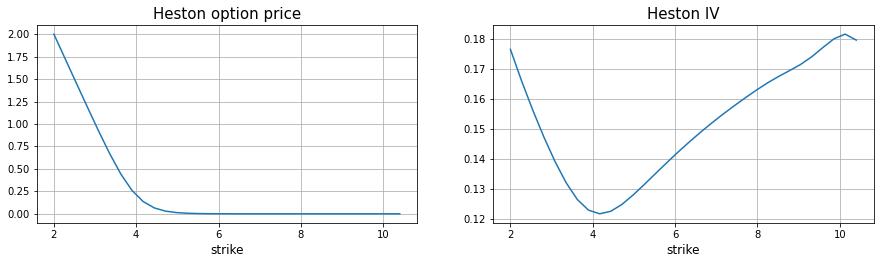

In [30]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch)
ax1.grid()
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh)
ax2.grid()
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

### Calibration to heston data

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 631.47it/s]


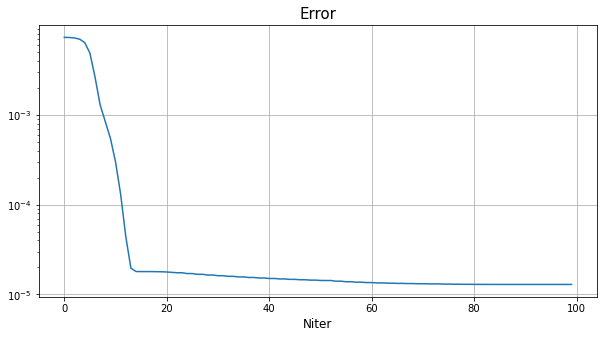

In [37]:
#calibrating sabr to heston
fs = sabr_calib.fit_price(ch, Kn, F, T, typ=True, fit_beta=True)
plt.figure(figsize=(10, 5))
plt.semilogy(fs)
plt.title("Error", fontsize=15)
plt.xlabel("Niter", fontsize=12)
plt.grid()

In [38]:
sabr_calib.sabr_params

array([ 0.12075383,  0.40205198,  0.99998612, -0.10335359])

In [39]:
#predicting 
c1, iv1 = sabr_calib.predict(Kn, F, T )

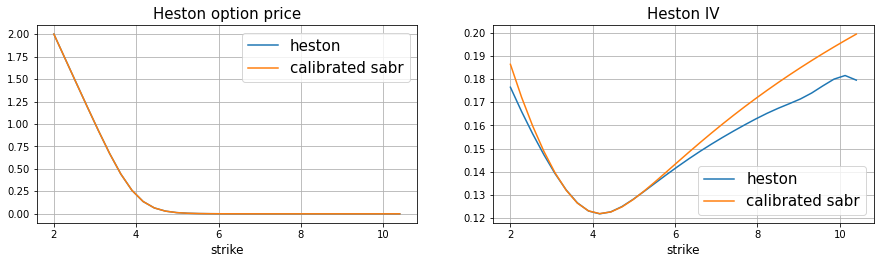

In [40]:
plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 2, 1)
ax1.plot(Kn, ch, label='heston')
ax1.plot(Kn, c1, label='calibrated sabr')
ax1.grid()
ax1.legend(fontsize=15)
ax1.set_title("Heston option price", fontsize=15)
ax1.set_xlabel("strike", fontsize=12)

ax2 = plt.subplot(2, 2, 2)
ax2.plot(Kn, ivh, label='heston')
ax2.plot(Kn, iv1, label='calibrated sabr')
ax2.grid()
ax2.legend(fontsize=15)
ax2.set_title("Heston IV", fontsize=15)
ax2.set_xlabel("strike", fontsize=12)

None

In [41]:
err_c = np.linalg.norm(c1 - ch) / np.linalg.norm(ch) * 100
err_iv = np.linalg.norm(iv1 - ivh) / np.linalg.norm(ivh) * 100

In [42]:
print(f"error in option price = {err_c:.4f}%,\nerror in iv = {err_iv:.4f}%")

error in option price = 0.0119%,
error in iv = 5.4022%
